<a href="https://colab.research.google.com/github/shadyeldeib/Optimization-of-machine-downtime/blob/main/Optimization_of_machine_downtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting industrial machine downtime
## About Dataset
This dataset contains information about the operational parameters of various machines and their downtime records
This dataset can be used to analyze machine performance, predict potential failures, and develop predictive maintenance strategies based on operational parameters.

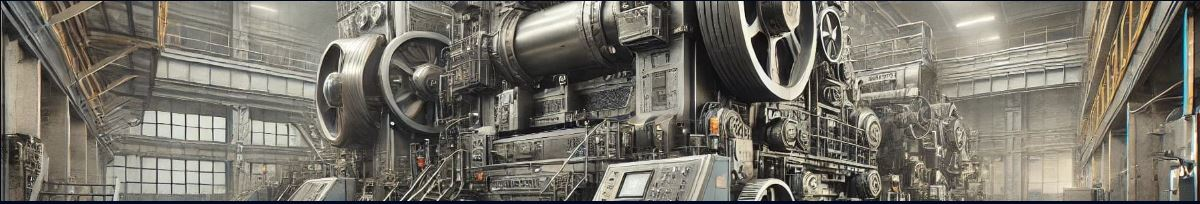

# Background
You work for a manufacturer of high-precision metal components used in aerospace, automotive, and medical device applications. Your company operates three different machines on its shop floor that produce different-sized components, so minimizing the downtime of these machines is vital for meeting production deadlines. Choose your difficulty level! You decide how challenging this competition will be. Depending on your skill level, decide on which aspect you want to focus. Each difficulty level uses the same dataset, but each time with increasing difficulty.

## Predicting industrial machine downtime 🔧 Level 1

### Your challenge

In this first level, you're going to explore and describe the data. This level is aimed towards beginners. If you want to challenge yourself a bit more, check out level two!

**Create a report that covers the following:**

- What is the first and last date readings were taken on?
- What is the average Torque?
- Which assembly line has the highest readings of machine downtime?


In [ ]:
!pip install plotly
!pip install calplot
!pip install plotly kaleido

In [ ]:
# prompt: mount google drive to open file

from google.colab import drive
drive.mount('/content/drive')

# Now you can access files in your Google Drive.
# For example, if your file is named 'Machine_Downtime_Dataset.csv' and is in the root of your Drive:
file_path = '/content/drive/MyDrive/Colab Notebooks/projects/Optimization of machine downtime/Machine Downtime.csv'

# You can then use pandas to read the file
import pandas as pd
df = pd.read_csv(file_path)

# Display the first few rows to verify
df



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-21,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-21,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-21,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-22,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-22,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,01-02-22,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,01-02-22,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,01-02-22,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-22,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [ ]:
# prompt: checking each datatype

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(?C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(?C)  2493 non-null   float64
 9   Spindle_Vibration(?m)            2489 non-null   float64
 10  Tool_Vibration(?m)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [ ]:
# prompt: change df['Date'] from object to date format

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2500 non-null   datetime64[ns]
 1   Machine_ID                       2500 non-null   object        
 2   Assembly_Line_No                 2500 non-null   object        
 3   Hydraulic_Pressure(bar)          2490 non-null   float64       
 4   Coolant_Pressure(bar)            2481 non-null   float64       
 5   Air_System_Pressure(bar)         2483 non-null   float64       
 6   Coolant_Temperature              2488 non-null   float64       
 7   Hydraulic_Oil_Temperature(?C)    2484 non-null   float64       
 8   Spindle_Bearing_Temperature(?C)  2493 non-null   float64       
 9   Spindle_Vibration(?m)            2489 non-null   float64       
 10  Tool_Vibration(?m)               2489 non-null   float64    

<ipython-input-170-335f3ac2f09f>:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
df['Date']

,Date
0,2021-12-31
1,2021-12-31
2,2021-12-31
3,2022-05-31
4,2022-03-31
...,...
2495,2022-01-02
2496,2022-01-02
2497,2022-01-02
2498,2022-01-02


In [ ]:
# prompt: df checking for null and duplicates

# Check for null values
print("Null values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

Null values per column:
Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(?C)      16
Spindle_Bearing_Temperature(?C)     7
Spindle_Vibration(?m)              11
Tool_Vibration(?m)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

Number of duplicate rows:
0


## What is the first and last date readings were taken on?

In [ ]:
# Task 1: First and last date readings
# You might need to convert a 'Date' column to datetime objects first
df['Date'] = pd.to_datetime(df['Date'])
first_date = df['Date'].min()
last_date = df['Date'].max()
print(f"First date of readings: {first_date}")
print(f"Last date of readings: {last_date}")

First date of readings: 2021-08-12 00:00:00
Last date of readings: 2022-12-05 00:00:00


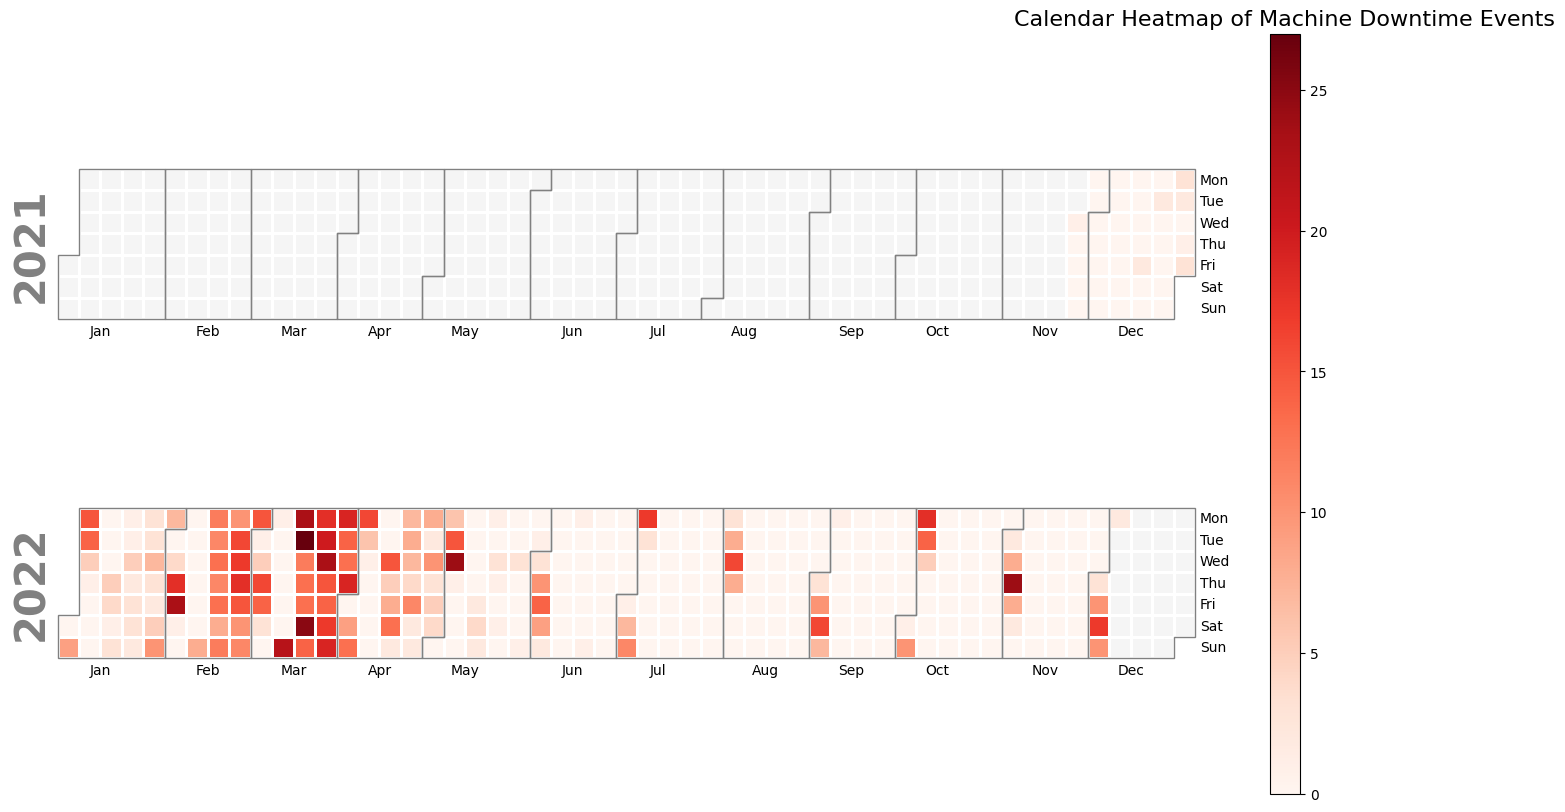

In [ ]:
# prompt: display calendar Heatmap shows Downtime during months

import calplot
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter for rows where 'Machinery Breakdown' is 'YES'
downtime_df = df[df['Downtime'] == 'Machine_Failure']

# Count the number of downtimes per day
downtime_counts = downtime_df.groupby('Date').size()
downtime_counts.index = pd.to_datetime(downtime_counts.index)

# Plot the calendar heatmap
calplot.calplot(downtime_counts, cmap='Reds', figsize=(15, 8), dropzero=False)
plt.title('Calendar Heatmap of Machine Downtime Events', fontsize=16)
plt.show()

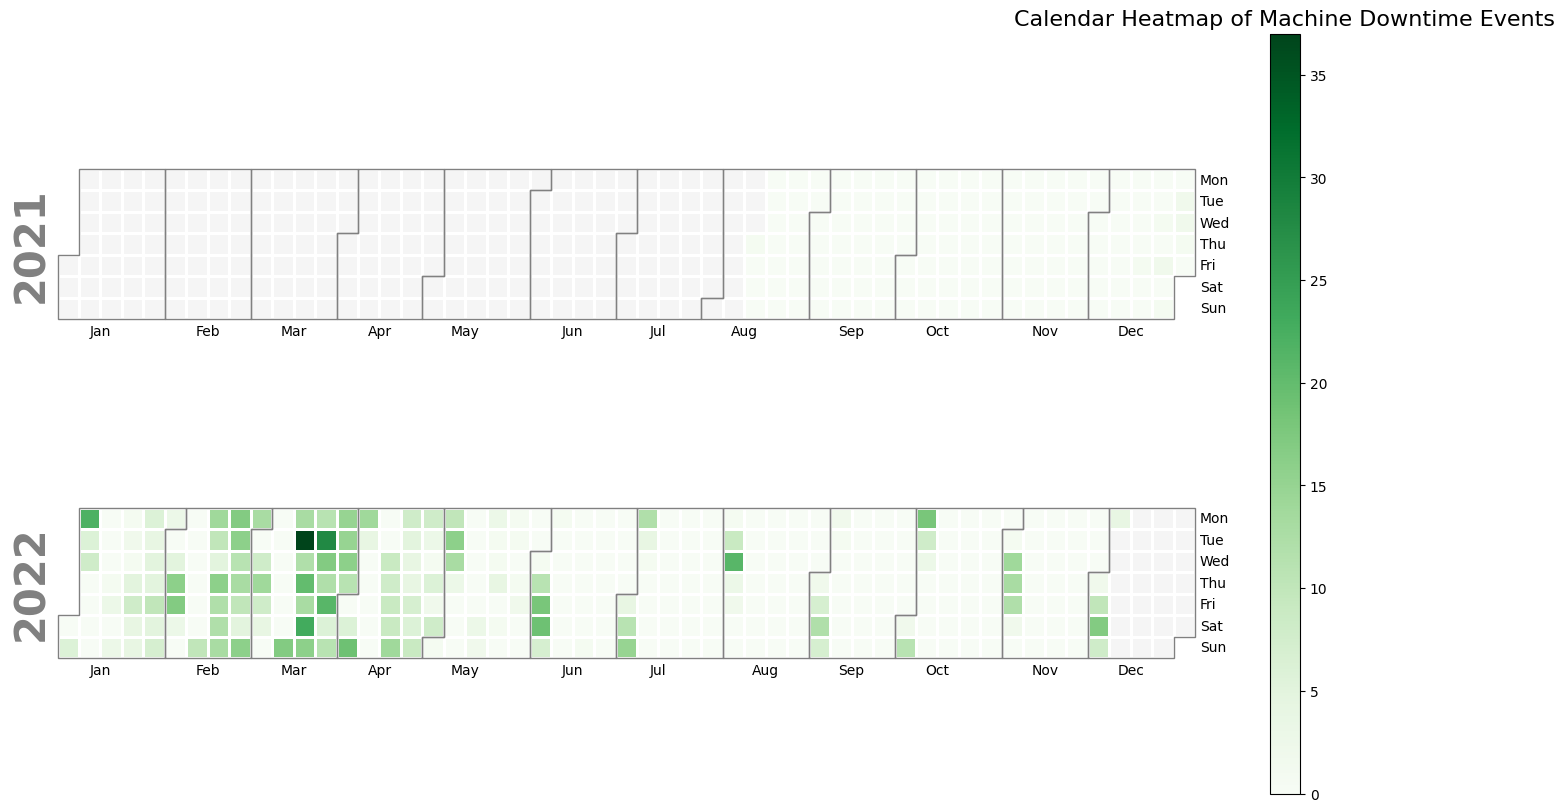

In [ ]:
import calplot
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter for rows where 'Machinery Breakdown' is 'YES'
downtime_df = df[df['Downtime'] == 'No_Machine_Failure']

# Count the number of downtimes per day
downtime_counts = downtime_df.groupby('Date').size()
downtime_counts.index = pd.to_datetime(downtime_counts.index)

# Plot the calendar heatmap
calplot.calplot(downtime_counts, cmap='Greens', figsize=(15, 8), dropzero=False)
plt.title('Calendar Heatmap of Machine Downtime Events', fontsize=16)
plt.show()

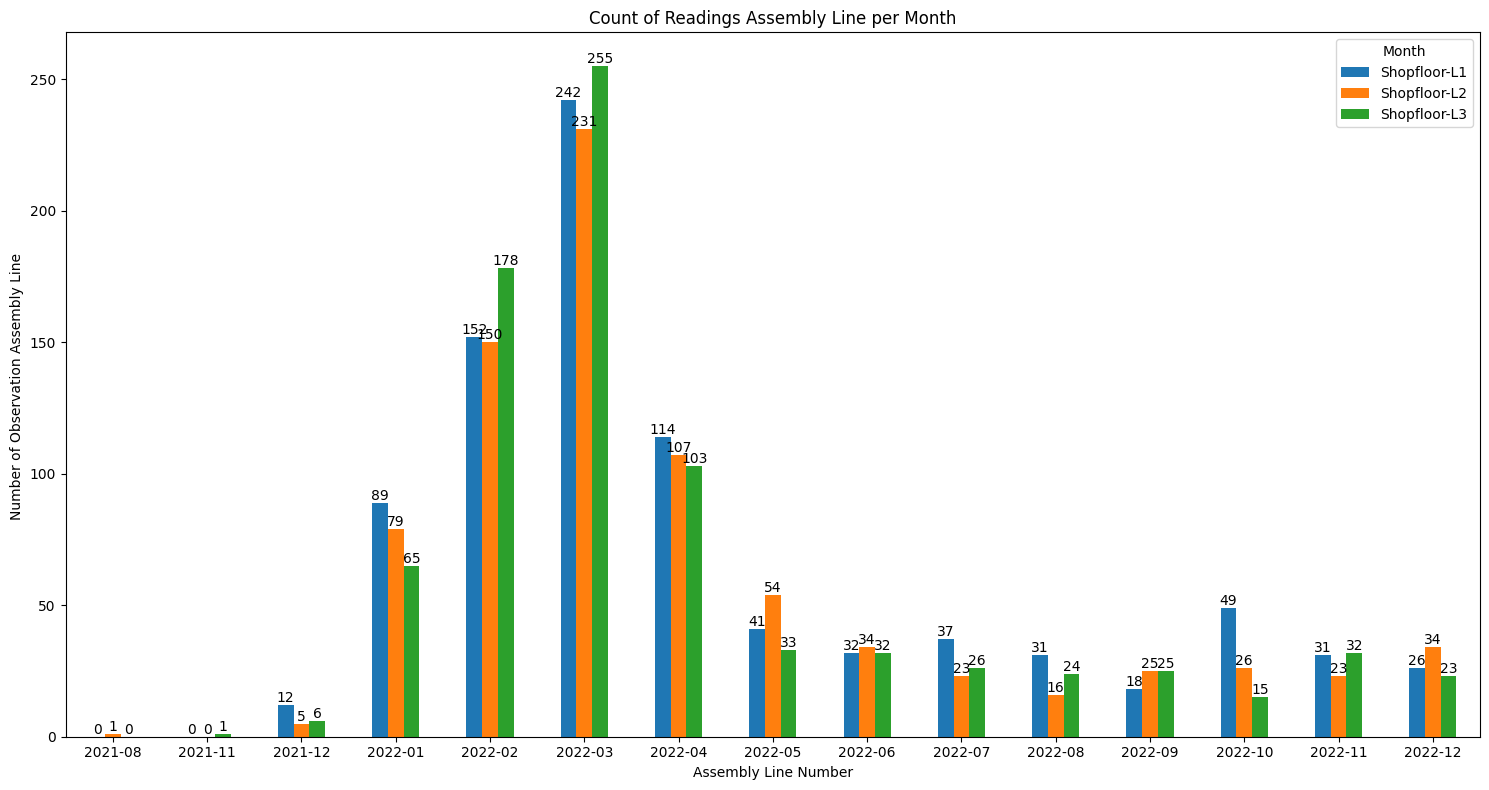

In [ ]:
# prompt: plot histogram shows counts for each Assembly_Line_No per month

# Group by Assembly_Line_No and month, then count occurrences
df['Month'] = df['Date'].dt.to_period('M')
assembly_line_counts = df.groupby(['Month','Assembly_Line_No']).size().unstack(fill_value=0)

# Plot histogram
ax = assembly_line_counts.plot(kind='bar', stacked=False, figsize=(15, 8))
plt.title('Count of Readings Assembly Line per Month')
plt.xlabel('Assembly Line Number')
plt.ylabel('Number of Observation Assembly Line ')
plt.xticks(rotation=0)
plt.legend(title='Month')

# Display values on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

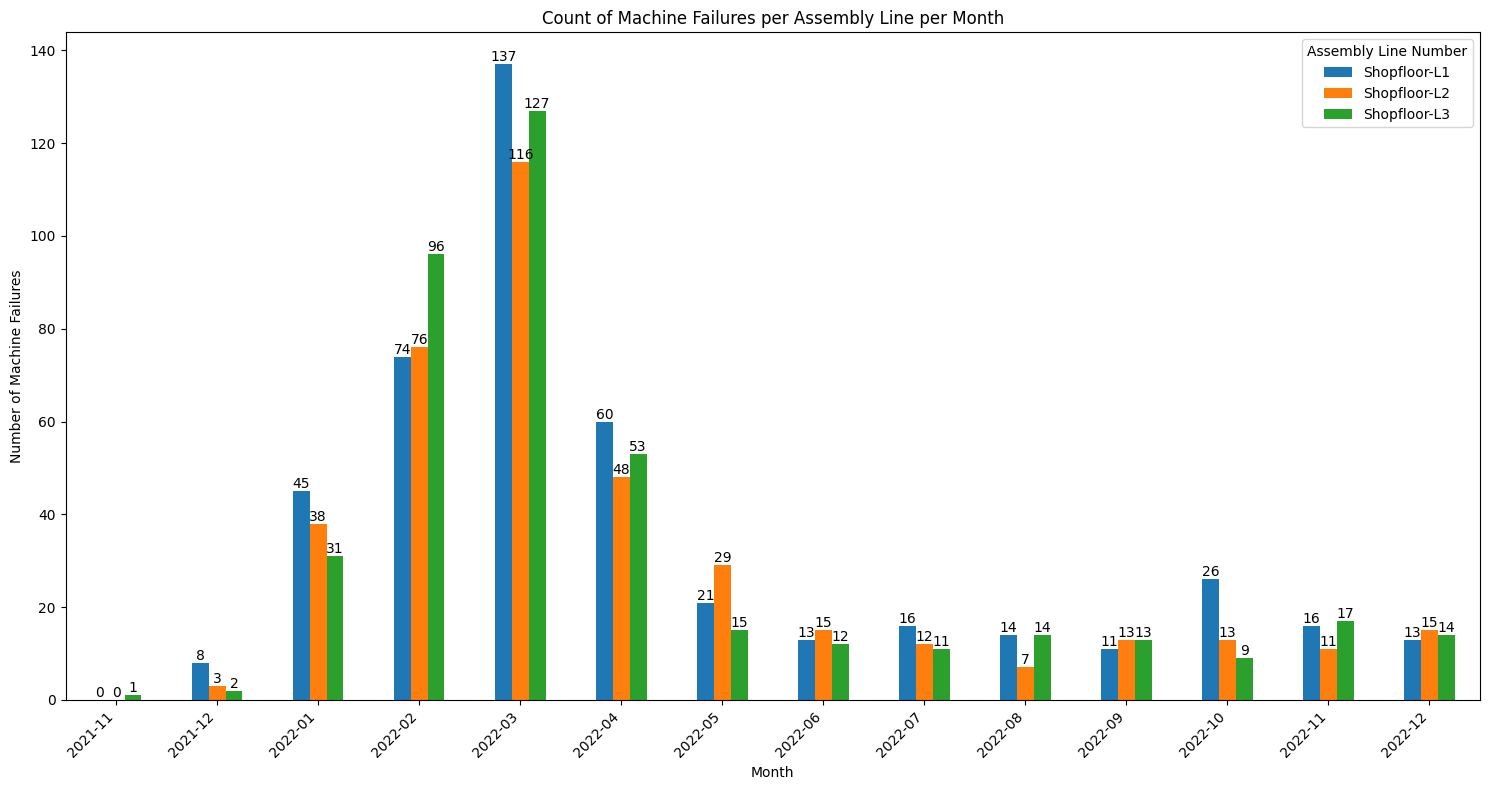

In [ ]:
# prompt: plot histogram shows counts for each Assembly_Line_No  Downtime Machine_Failure per month

# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month
df['Month'] = df['Date'].dt.to_period('M')

# Filter for rows where 'Downtime' is 'Machine_Failure'
failure_df = df[df['Downtime'] == 'Machine_Failure'].copy()

# Group by month and Assembly_Line_No, then count machine failures
failure_counts = failure_df.groupby(['Month', 'Assembly_Line_No']).size().unstack(fill_value=0)

# Plot histogram
ax = failure_counts.plot(kind='bar', stacked=False, figsize=(15, 8))
plt.title('Count of Machine Failures per Assembly Line per Month')
plt.xlabel('Month')
plt.ylabel('Number of Machine Failures')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Assembly Line Number')

# Display values on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

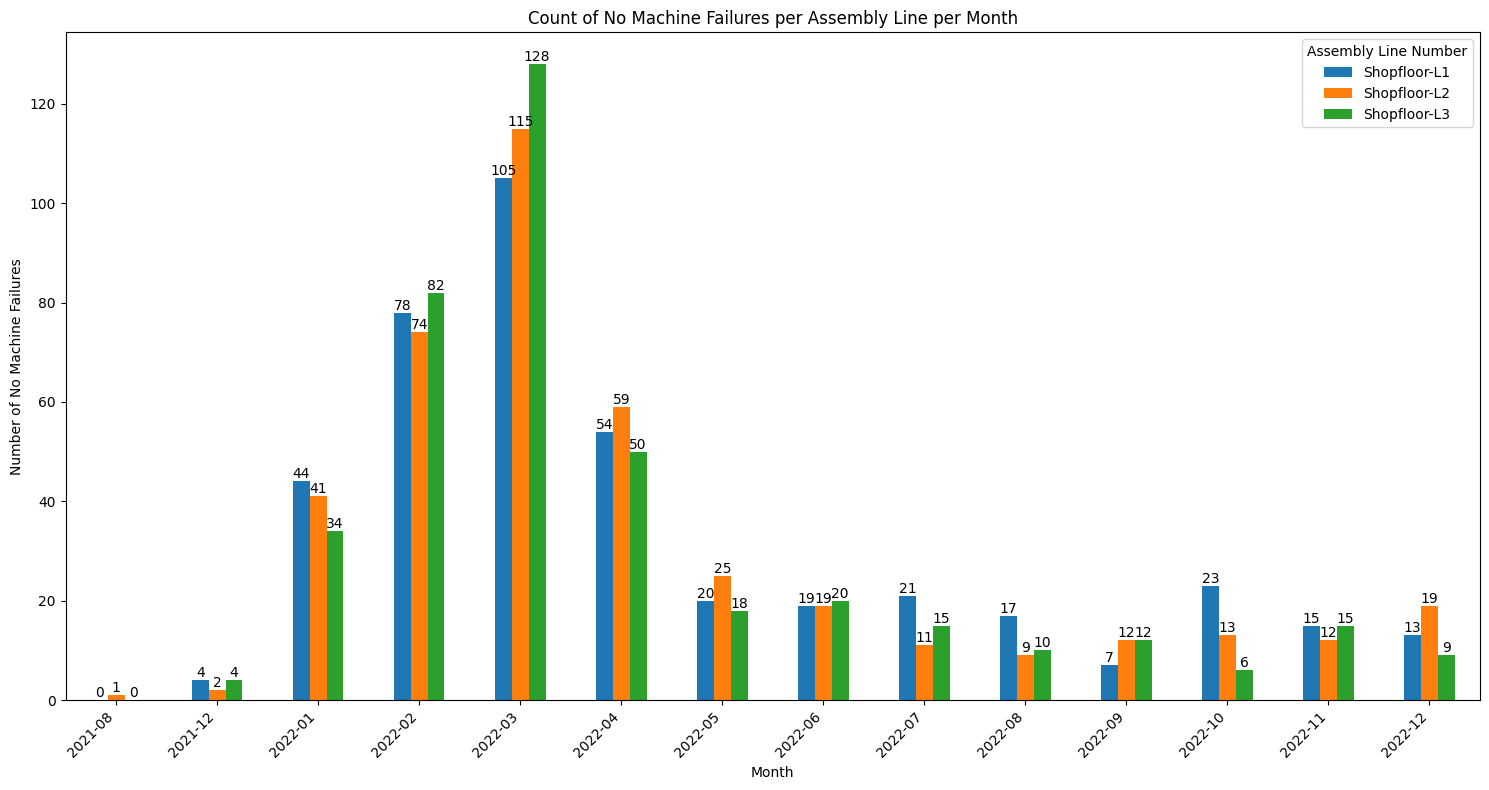

In [ ]:
# prompt: plot histogram shows counts for each Assembly_Line_No  Downtime No_Machine_Failure per month

# Filter for rows where 'Downtime' is 'No_Machine_Failure'
no_failure_df = df[df['Downtime'] == 'No_Machine_Failure'].copy()

# Group by month and Assembly_Line_No, then count no machine failures
no_failure_counts = no_failure_df.groupby(['Month', 'Assembly_Line_No']).size().unstack(fill_value=0)

# Plot histogram
ax = no_failure_counts.plot(kind='bar', stacked=False, figsize=(15, 8))
plt.title('Count of No Machine Failures per Assembly Line per Month')
plt.xlabel('Month')
plt.ylabel('Number of No Machine Failures')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Assembly Line Number')

# Display values on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Assume you have a DataFrame named 'df' with your data
# It should have columns: 'Assembly_Line_No', 'Month', 'Downtime_Machine_Failure', 'No_Machine_Failure'

# Extract month
df['Month'] = df['Date'].dt.to_period('M')
# Filter for rows where 'Downtime' is 'Machine_Failure'
failure_df = df[df['Downtime'] == 'Machine_Failure'].copy()

no_failure_df = df[df['Downtime'] == 'No_Machine_Failure'].copy()

# Example DataFrame (replace with your actual data loading and aggregation)
data = {'Assembly_Line_No': df['Assembly_Line_No'],
        'Month': df['Month'],
        'Machine_Failure': failure_df ,
        'No_Machine_Failure': no_failure_df}
df = pd.DataFrame(data)

# Convert 'Month' to a proper date format
df['Date'] = pd.to_datetime(df['Month'].astype(str) + '/1/2023') # Replace 2023 with the actual year

# Melt the DataFrame to have 'Failure_Type' and 'Count' columns
df_melted = df.melt(id_vars=['Assembly_Line_No', 'Date'],
                    value_vars=['Machine_Failure', 'No_Machine_Failure'],
                    var_name='Failure_Type',
                    value_name='Count')

# Create the line plot
fig = px.line(df_melted,
              x='Date',
              y='Count',
              color='Assembly_Line_No',  # Separate lines by Assembly_Line_No
              line_dash='Failure_Type', # Use line dash to distinguish failure types
              title='Machine Failure Counts per Month by Assembly Line')

fig.update_layout(xaxis_title='Month',
                  yaxis_title='Count',
                  legend_title='Assembly Line / Failure Type') # Customize legend title

fig.show()


ValueError: 2

In [ ]:
import pandas as pd
import plotly.express as px

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Adjust format if needed

# Extract month
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Group and count failures
failure_counts = df[df['Downtime'] == 'Machine_Failure'].groupby(['Assembly_Line_No', 'Month']).size().reset_index(name='Machine_Failure')
no_failure_counts = df[df['Downtime'] == 'No_Machine_Failure'].groupby(['Assembly_Line_No', 'Month']).size().reset_index(name='No_Machine_Failure')

# Merge the two sets of counts
summary_df = pd.merge(failure_counts, no_failure_counts,
                      on=['Assembly_Line_No', 'Month'],
                      how='outer').fillna(0)

# Melt the DataFrame for plotting
df_melted = summary_df.melt(id_vars=['Assembly_Line_No', 'Month'],
                            value_vars=['Machine_Failure', 'No_Machine_Failure'],
                            var_name='Failure_Type',
                            value_name='Count')

# Create line plot
fig = px.line(df_melted,
              x='Month',
              y='Count',
              color='Assembly_Line_No',
              line_dash='Failure_Type',
              title='Monthly Machine Downtime Counts per Assembly Line')

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Count',
    legend_title='Assembly Line / Failure Type'
)

fig.show()


## What is the average Torque?

In [ ]:
average_torque = df['Torque(Nm)'].mean()
print(f"Average Torque: {average_torque}")

Average Torque: 25.234967730137154


<ipython-input-141-93d264f7767d>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




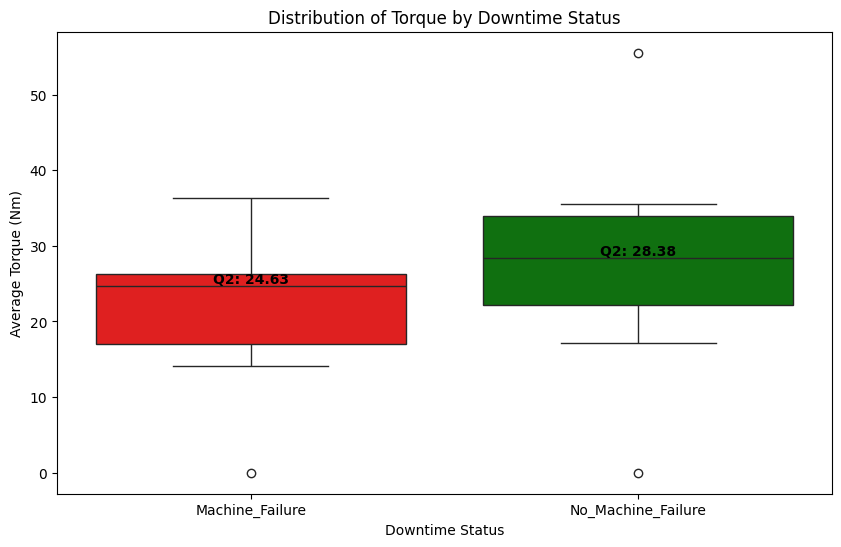

In [ ]:
# prompt: boxplot shows average_torque vs Downtime make Machine_Failure apears Red and No_Machine_Failure Green and display q2

import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Downtime', y='Torque(Nm)', data=df, palette={'Machine_Failure': 'red', 'No_Machine_Failure': 'green'})
plt.title('Distribution of Torque by Downtime Status')
plt.xlabel('Downtime Status')
plt.ylabel('Average Torque (Nm)')

# Calculate and display Q2 (median) for each group
for i, downtime_status in enumerate(df['Downtime'].unique()):
    median_torque = df[df['Downtime'] == downtime_status]['Torque(Nm)'].median()
    plt.text(i, median_torque, f'Q2: {median_torque:.2f}',
             horizontalalignment='center', verticalalignment='bottom',
             color='black', fontweight='bold')

plt.show()

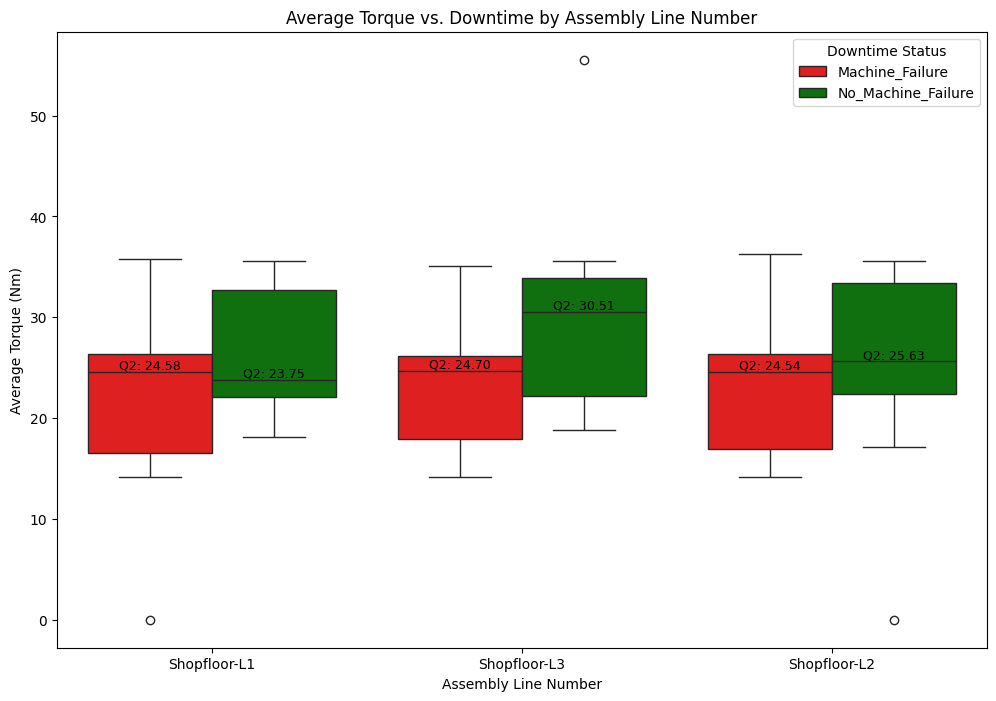

In [ ]:
# prompt: boxplot shows average_torque vs Downtime in each Assembly_Line_No and display q2

# Create the boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Assembly_Line_No', y='Torque(Nm)', hue='Downtime', data=df, palette={'Machine_Failure': 'red', 'No_Machine_Failure': 'green'})
plt.title('Average Torque vs. Downtime by Assembly Line Number')
plt.xlabel('Assembly Line Number')
plt.ylabel('Average Torque (Nm)')
plt.legend(title='Downtime Status')

# Calculate and display Q2 (median) for each group within each Assembly Line
for i, line in enumerate(df['Assembly_Line_No'].unique()):
    line_df = df[df['Assembly_Line_No'] == line]
    for j, downtime_status in enumerate(line_df['Downtime'].unique()):
        group_df = line_df[line_df['Downtime'] == downtime_status]
        if not group_df.empty:
            median_torque = group_df['Torque(Nm)'].median()
            # Adjust x-position slightly for hue separation
            text_x_position = i + (j - (len(line_df['Downtime'].unique()) - 1) / 2) * 0.4
            plt.text(text_x_position, median_torque, f'Q2: {median_torque:.2f}',
                     horizontalalignment='center', verticalalignment='bottom',
                     color='black', fontsize=9)

plt.show()

## Which assembly line has the highest readings of machine downtime?

In [ ]:
# prompt: display what inside df['Assembly_Line_No']

print(df['Assembly_Line_No'].value_counts())

Assembly_Line_No
Shopfloor-L1    874
Shopfloor-L3    818
Shopfloor-L2    808
Name: count, dtype: int64


In [ ]:
# prompt: display what inside df['Downtime']

print(df['Downtime'].value_counts())

Downtime
Machine_Failure       1265
No_Machine_Failure    1235
Name: count, dtype: int64


In [ ]:
# prompt: display what inside group by df['Assembly_Line_No'] df['Downtime']

df.groupby('Assembly_Line_No')['Downtime'].value_counts()

Assembly_Line_No  Downtime          
Shopfloor-L1      Machine_Failure       454
                  No_Machine_Failure    420
Shopfloor-L2      No_Machine_Failure    412
                  Machine_Failure       396
Shopfloor-L3      Machine_Failure       415
                  No_Machine_Failure    403
Name: count, dtype: int64

In [ ]:
# prompt: df.groupby('Assembly_Line_No')['Downtime'].value_counts()   display two column Machine_Failure and No_Machine_Failure

downtime_counts = df.groupby('Assembly_Line_No')['Downtime'].value_counts().unstack(fill_value=0)

downtime_counts

Downtime,Machine_Failure,No_Machine_Failure
Assembly_Line_No,,
Shopfloor-L1,454,420
Shopfloor-L2,396,412
Shopfloor-L3,415,403


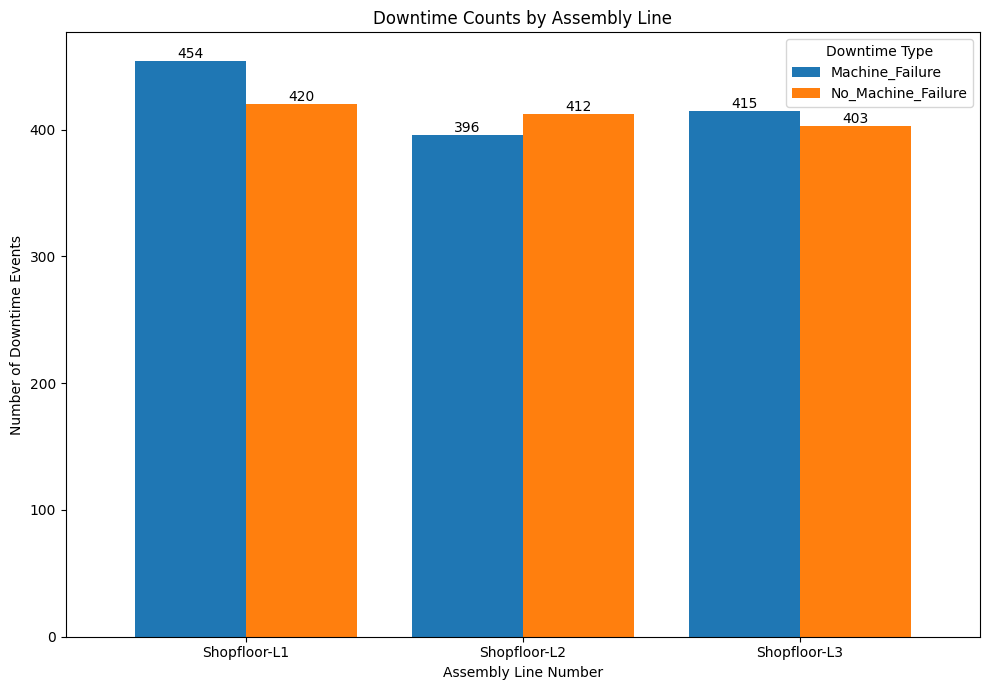

In [ ]:
# prompt: barplot downtime_counts , stacked=False and displaying values

import matplotlib.pyplot as plt

ax = downtime_counts.plot(kind='bar', stacked=False, figsize=(10,7), width=0.8)
plt.title('Downtime Counts by Assembly Line')
plt.xlabel('Assembly Line Number')
plt.ylabel('Number of Downtime Events')
plt.xticks(rotation=0)
plt.legend(title='Downtime Type')

# Display values on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()


In [ ]:
# Task 3: Assembly line with highest downtime
# Assuming there's an 'Assembly_Line' column and a 'Downtime' column
# You might need to sum downtime per assembly line
downtime_by_line = df.groupby('Assembly_Line_No')['Downtime'].value_counts()
highest_downtime_line = downtime_by_line.idxmax()
highest_downtime_value = downtime_by_line.max()
print(f"Assembly line with the highest downtime: {highest_downtime_line} with total downtime of {highest_downtime_value}")

Assembly line with the highest downtime: ('Shopfloor-L1', 'Machine_Failure') with total downtime of 454


In [ ]:
!pip install plotly kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00


In [ ]:
# prompt: selecting the first cell in downtime_counts
downtime_counts


Downtime,Machine_Failure,No_Machine_Failure
Assembly_Line_No,,
Shopfloor-L1,454,420
Shopfloor-L2,396,412
Shopfloor-L3,415,403


In [ ]:
L1    = downtime_counts.loc['Shopfloor-L1', 'Machine_Failure']
L1_NO = downtime_counts.loc['Shopfloor-L1', 'No_Machine_Failure']
L2    = downtime_counts.loc['Shopfloor-L2', 'Machine_Failure']
L2_NO = downtime_counts.loc['Shopfloor-L2', 'No_Machine_Failure']
L3    = downtime_counts.loc['Shopfloor-L3', 'Machine_Failure']
L3_NO = downtime_counts.loc['Shopfloor-L3', 'No_Machine_Failure']

In [ ]:
import plotly.graph_objects as go

downtime_counts_L1 = L1
total_L1 = L1 + L1_NO

range_green = 0.50 * (L1 + L1_NO)
range_yellow = 0.80 * (L1 + L1_NO)
range_red = 1.00 * (L1 + L1_NO)

# Assuming downtime_counts is already defined

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=downtime_counts_L1,
    title={'text': f"Downtime Assembly Line Counts of Shopfloor-L1 ({round(L1*100/total_L1,2)}%) "},
    gauge={'axis': {'range': [0, total_L1]}, # Set the range for your gauge
           'bar': {'color': "darkblue"},
           'steps': [
               {'range': [0, range_green], 'color': "green"},
               {'range': [range_green, range_yellow], 'color': "yellow"},
               {'range': [range_yellow, range_red], 'color': "red"}],
           'threshold': {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': downtime_counts_L1}})) # Optional: Add a threshold line

fig.show()

In [ ]:
downtime_counts_L2 = L2
total_L2 = L2 + L2_NO

range_green = 0.50 * (L2 + L2_NO)
range_yellow = 0.80 * (L2 + L2_NO)
range_red = 1.00 * (L2 + L2_NO)

# Assuming downtime_counts is already defined

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=downtime_counts_L2,
    title={'text': f"Downtime Assembly Line Counts of Shopfloor-L2 ({round(L2*100/total_L2,2)}%) "},
    gauge={'axis': {'range': [0, total_L2]}, # Set the range for your gauge
           'bar': {'color': "darkblue"},
           'steps': [
               {'range': [0, range_green], 'color': "green"},
               {'range': [range_green, range_yellow], 'color': "yellow"},
               {'range': [range_yellow, range_red], 'color': "red"}],
           'threshold': {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': downtime_counts_L2}})) # Optional: Add a threshold line

fig.show()

In [ ]:
downtime_counts_L3 = L3
total_L3 = L3 + L3_NO

range_green = 0.50 * (L3 + L3_NO)
range_yellow = 0.80 * (L3 + L3_NO)
range_red = 1.00 * (L3 + L3_NO)

# Assuming downtime_counts is already defined

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=downtime_counts_L3,
    title={'text': f"Downtime Assembly Line Counts of Shopfloor-L3 ({round(L3*100/total_L3,2)}%) "},
    gauge={'axis': {'range': [0, total_L3]}, # Set the range for your gauge
           'bar': {'color': "darkblue"},
           'steps': [
               {'range': [0, range_green], 'color': "green"},
               {'range': [range_green, range_yellow], 'color': "yellow"},
               {'range': [range_yellow, range_red], 'color': "red"}],
           'threshold': {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': downtime_counts_L3}})) # Optional: Add a threshold line

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ... your data definitions for L1, L1_NO, L2, L2_NO, L3, L3_NO ...

downtime_counts_L1 = L1
total_L1 = L1 + L1_NO
range_green_L1 = 0.50 * total_L1
range_yellow_L1 = 0.80 * total_L1
range_red_L1 = 1.00 * total_L1

downtime_counts_L2 = L2
total_L2 = L2 + L2_NO
range_green_L2 = 0.50 * total_L2
range_yellow_L2 = 0.80 * total_L2
range_red_L2 = 1.00 * total_L2

downtime_counts_L3 = L3
total_L3 = L3 + L3_NO
range_green_L3 = 0.50 * total_L3
range_yellow_L3 = 0.80 * total_L3
range_red_L3 = 1.00 * total_L3

fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}]],
    subplot_titles=('Shopfloor-L1', 'Shopfloor-L2', 'Shopfloor-L3')
)

fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=downtime_counts_L1,
    title={'text': f"Downtime Assembly Line of Shopfloor-L1 ({round(L1*100/total_L1,2)}%) "},
    gauge={'axis': {'range': [0, total_L1]},
           'bar': {'color': "darkblue"},
           'steps': [
               {'range': [0, range_green_L1], 'color': "green"},
               {'range': [range_green_L1, range_yellow_L1], 'color': "yellow"},
               {'range': [range_yellow_L1, range_red_L1], 'color': "red"}],
           'threshold': {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': downtime_counts_L1}}),
    row=1, col=1)

fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=downtime_counts_L2,
    title={'text': f"Downtime Assembly Line of Shopfloor-L2 ({round(L2*100/total_L2,2)}%) "},
    gauge={'axis': {'range': [0, total_L2]},
           'bar': {'color': "darkblue"},
           'steps': [
               {'range': [0, range_green_L2], 'color': "green"},
               {'range': [range_green_L2, range_yellow_L2], 'color': "yellow"},
               {'range': [range_yellow_L2, range_red_L2], 'color': "red"}],
           'threshold': {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': downtime_counts_L2}}),
    row=1, col=2)

fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=downtime_counts_L3,
    title={'text': f"Downtime Assembly Line of Shopfloor-L3 ({round(L3*100/total_L3,2)}%) "},
    gauge={'axis': {'range': [0, total_L3]},
           'bar': {'color': "darkblue"},
           'steps': [
               {'range': [0, range_green_L3], 'color': "green"},
               {'range': [range_green_L3, range_yellow_L3], 'color': "yellow"},
               {'range': [range_yellow_L3, range_red_L3], 'color': "red"}],
           'threshold': {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': downtime_counts_L3}}),
    row=1, col=3)

fig.update_layout(height=400, margin={'t':0, 'b':0, 'l':0})
fig.show()

## Predicting industrial machine downtime 🔧 Level 2
### Your challenge

In this second level, you're going to visualize and examine the data in more detail. This level is aimed towards intermediate learners. If you want to challenge yourself a bit more, check out level three!

**Create a report that covers the following:**

- Explore correlations between the various operational data in the dataset.
- Do you see a pattern in machine downtime over time?
- Which factors (visually) seem to be connected to machine downtime?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Now you can access files in your Google Drive.
# For example, if your file is named 'Machine_Downtime_Dataset.csv' and is in the root of your Drive:
file_path = '/content/drive/MyDrive/Colab Notebooks/projects/Optimization of machine downtime/Machine Downtime.csv'

# You can then use pandas to read the file
import pandas as pd
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2500 non-null   datetime64[ns]
 1   Machine_ID                       2500 non-null   object        
 2   Assembly_Line_No                 2500 non-null   object        
 3   Hydraulic_Pressure(bar)          2490 non-null   float64       
 4   Coolant_Pressure(bar)            2481 non-null   float64       
 5   Air_System_Pressure(bar)         2483 non-null   float64       
 6   Coolant_Temperature              2488 non-null   float64       
 7   Hydraulic_Oil_Temperature(?C)    2484 non-null   float64       
 8   Spindle_Bearing_Temperature(?C)  2493 non-null   float64       
 9   

<ipython-input-3-b061a1d4b4d9>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2022-01-02,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,2022-01-02,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,2022-01-02,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,2022-01-02,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


## Explore correlations between the various operational data in the dataset.

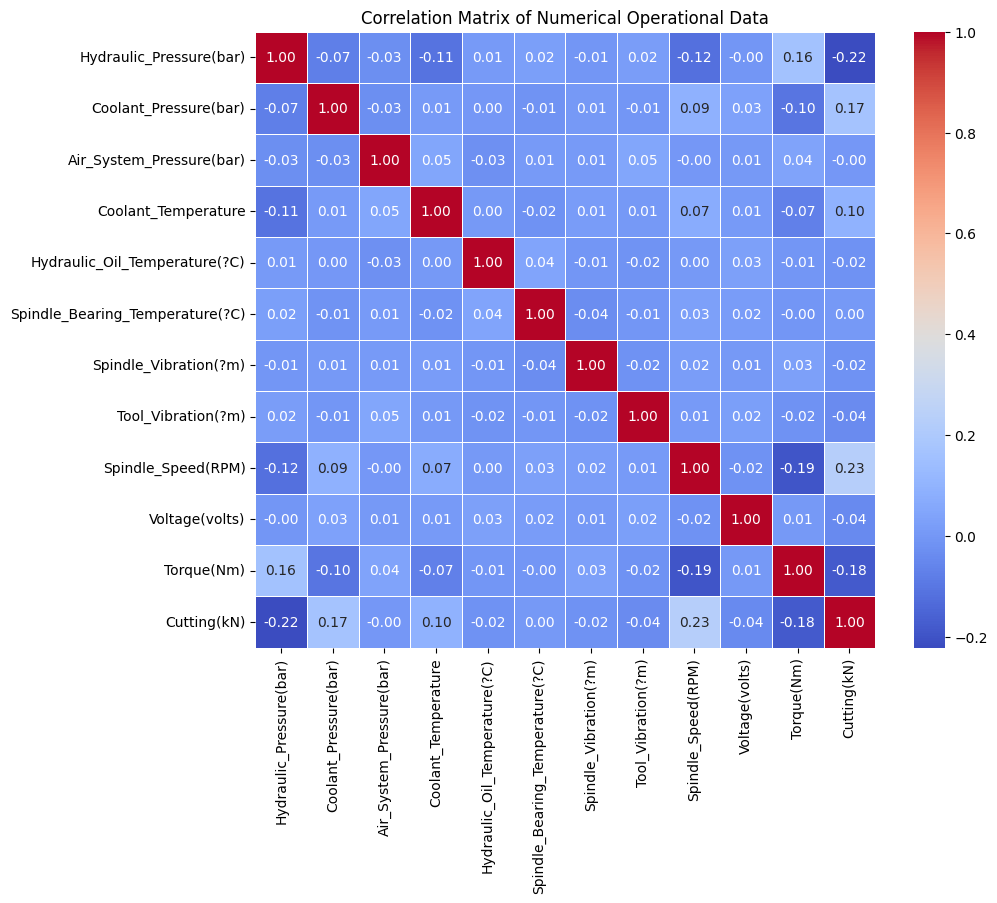

In [ ]:
# prompt: Explore correlations between the various operational data in the dataset.

# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Operational Data')
plt.show()

## Do you see a pattern in machine downtime over time?

In [ ]:
# prompt: Do you see a pattern in machine downtime over time?
import plotly.express as px
# Filter for rows where 'Downtime' is 'Machine_Failure'
downtime_df = df[df['Downtime'] == 'Machine_Failure'].copy()

# Group by Date and count failures
daily_failures = downtime_df.groupby('Date').size().reset_index(name='failure_count')

# Create a line plot to visualize failures over time
fig = px.line(daily_failures, x='Date', y='failure_count',
              title='Daily Machine Failure Count Over Time')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Machine Failures',
    hovermode='x unified'
)

fig.show()

# You can also look at monthly patterns
downtime_df['Month'] = downtime_df['Date'].dt.to_period('M').dt.to_timestamp()
monthly_failures = downtime_df.groupby('Month').size().reset_index(name='monthly_failure_count')

fig = px.line(monthly_failures, x='Month', y='monthly_failure_count',
              title='Monthly Machine Failure Count Over Time')

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Machine Failures',
    hovermode='x unified'
)

fig.show()

## Which factors (visually) seem to be connected to machine downtime?

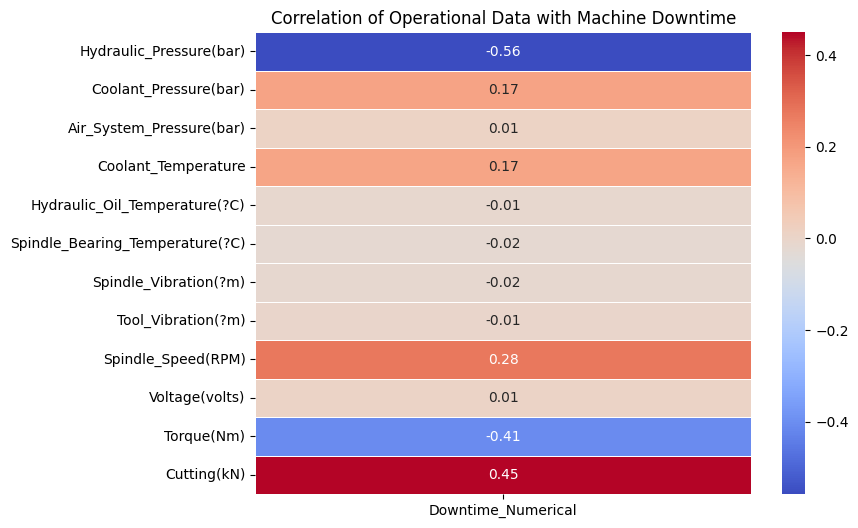

In [ ]:
# prompt: heatmap of Downtime vs the rest

# Convert 'Downtime' to a numerical variable if needed (e.g., 1 for 'Machine_Failure', 0 otherwise)
df['Downtime_Numerical'] = df['Downtime'].apply(lambda x: 1 if x == 'Machine_Failure' else 0)

# Select relevant numerical columns including the new 'Downtime_Numerical' column
numerical_cols_with_downtime = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix including the numerical representation of Downtime
correlation_matrix_with_downtime = df[numerical_cols_with_downtime].corr()

# Extract the correlations specifically with the 'Downtime_Numerical' column
downtime_correlations = correlation_matrix_with_downtime[['Downtime_Numerical']].drop('Downtime_Numerical') # Drop self-correlation

# Plot the heatmap of correlations with Downtime
plt.figure(figsize=(8, 6))
sns.heatmap(downtime_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Operational Data with Machine Downtime')
plt.show()

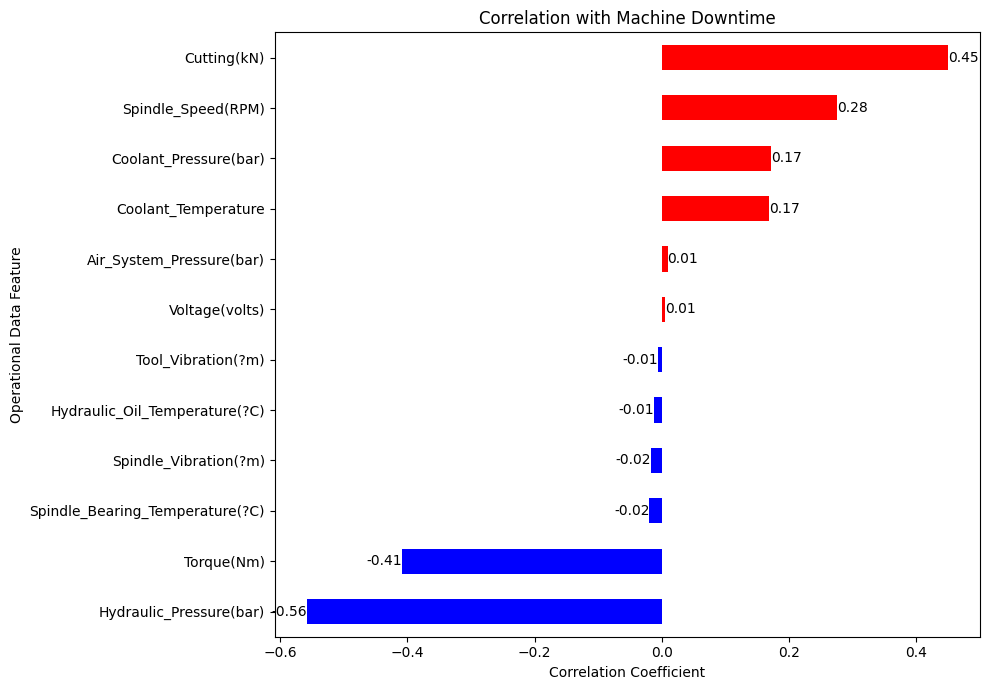

In [ ]:
# prompt: bar plot of correlation Downtime vs the rest by displaying each value

# Extract the correlation of 'Downtime_Numerical' with other columns
downtime_corr_values = correlation_matrix_with_downtime['Downtime_Numerical'].drop('Downtime_Numerical')

# Create a bar plot
plt.figure(figsize=(10, 7))
ax = downtime_corr_values.sort_values().plot(kind='barh', color=downtime_corr_values.sort_values().apply(lambda x: 'red' if x > 0 else 'blue'))
plt.title('Correlation with Machine Downtime')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Operational Data Feature')

# Display the correlation values on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

<ipython-input-30-2dbf95401cce>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




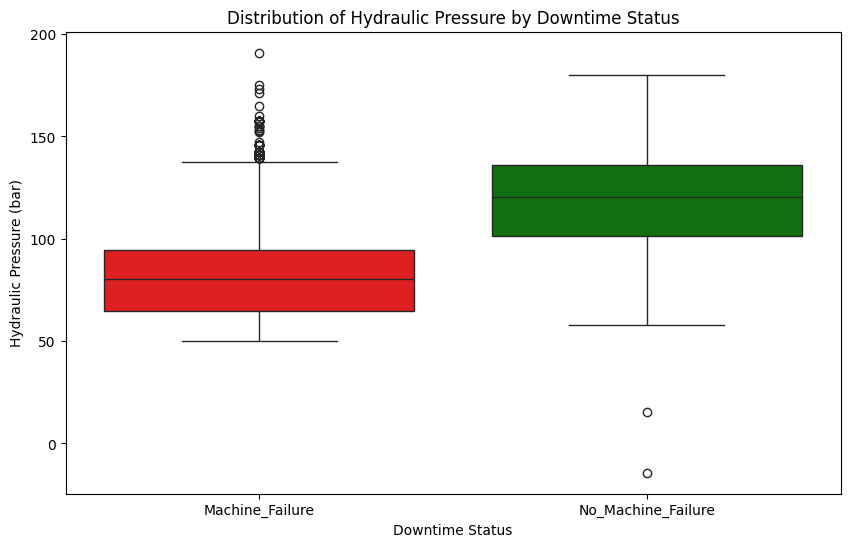

In [ ]:
# prompt: box plot Downtime vs Hydraulic_Pressure(bar)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Downtime', y='Hydraulic_Pressure(bar)', data=df, palette={'Machine_Failure': 'red', 'No_Machine_Failure': 'green'})
plt.title('Distribution of Hydraulic Pressure by Downtime Status')
plt.xlabel('Downtime Status')
plt.ylabel('Hydraulic Pressure (bar)')
plt.show()

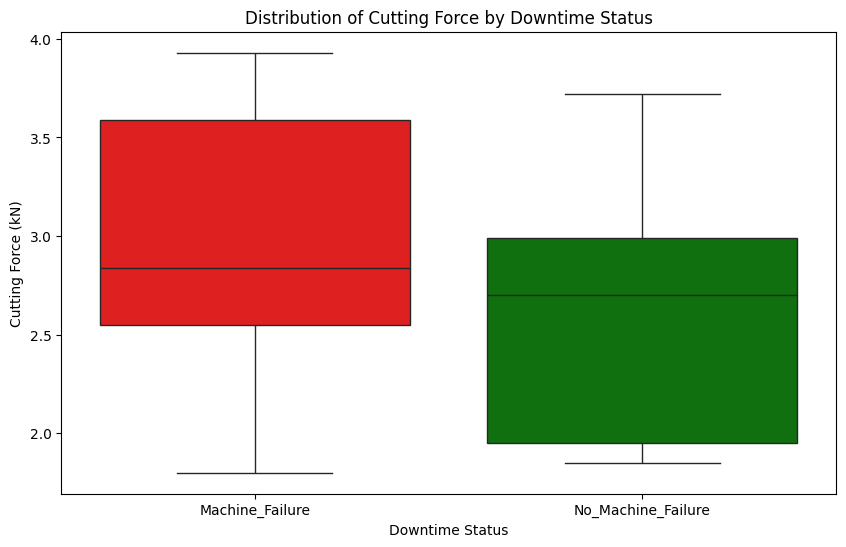

In [ ]:
# prompt: box plot Downtime vs Cutting(kN)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Downtime', y='Cutting(kN)', data=df, palette={'Machine_Failure': 'red', 'No_Machine_Failure': 'green'})
plt.title('Distribution of Cutting Force by Downtime Status')
plt.xlabel('Downtime Status')
plt.ylabel('Cutting Force (kN)')
plt.show()